In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow

In [3]:
# If you need to kill process: 
# https://stackoverflow.com/questions/45767905/errno-10048-only-one-usage-of-each-socket-address-protocol-network-address-p

In [4]:
SCOPES = ["https://www.googleapis.com/auth/yt-analytics.readonly"]
# https://developers.google.com/identity/protocols/oauth2/scopes

# https://github.com/googleapis/google-api-python-client/blob/main/docs/dyn/index.md
API_SERVICE_NAME = "youtubeAnalytics"
API_VERSION = "v2"
CLIENT_SECRETS_FILE = "/youtube_analytics/client_secret_889124158621-s2c9bu0j2batb5nvm2mlni74efq63okq.apps.googleusercontent.com.json"

def get_service():
    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
    credentials = flow.run_local_server()
    return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
    response = client_library_function(
        **kwargs
    ).execute()
    print(response)
    return response

today = datetime.today().strftime('%Y-%m-%d')

In [5]:
'''# Top 10 Videos by...
if __name__ == "__main__":

    # https://developers.google.com/youtube/analytics/data_model
    youtubeAnalytics = get_service()
    result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids="channel==MINE",
        startDate="2022-01-01",
        endDate=today,
        metrics="views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares",
        dimensions="video",
        maxResults=10,
        sort="-estimatedMinutesWatched"
    )'''

'# Top 10 Videos by...\nif __name__ == "__main__":\n\n    # https://developers.google.com/youtube/analytics/data_model\n    youtubeAnalytics = get_service()\n    result = execute_api_request(\n        youtubeAnalytics.reports().query,\n        ids="channel==MINE",\n        startDate="2022-01-01",\n        endDate=today,\n        metrics="views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares",\n        dimensions="video",\n        maxResults=10,\n        sort="-estimatedMinutesWatched"\n    )'

In [6]:
if __name__ == "__main__":

    # https://developers.google.com/youtube/analytics/data_model
    youtubeAnalytics = get_service()
    result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids="channel==MINE",
        startDate="2022-01-01",
        endDate=today,
        metrics="views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares",
        dimensions="day,creatorContentType",
        sort="day"
    )

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=889124158621-s2c9bu0j2batb5nvm2mlni74efq63okq.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=121KgKEHsbmyQBQRHIBScqlG819Aj7&access_type=offline
{'kind': 'youtubeAnalytics#resultTable', 'columnHeaders': [{'name': 'day', 'columnType': 'DIMENSION', 'dataType': 'STRING'}, {'name': 'creatorContentType', 'columnType': 'DIMENSION', 'dataType': 'STRING'}, {'name': 'views', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'likes', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'subscribersGained', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'estimatedMinutesWatched', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'averageViewDuration', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'shares', 'columnType': 'METRIC', 'dataTy

In [7]:
columns = [
    result['columnHeaders'][0]['name'],
    result['columnHeaders'][1]['name'],
    result['columnHeaders'][2]['name'],
    result['columnHeaders'][3]['name'],
    result['columnHeaders'][4]['name'],
    result['columnHeaders'][5]['name'],
    result['columnHeaders'][6]['name'],
    result['columnHeaders'][7]['name']
]
columns

['day',
 'creatorContentType',
 'views',
 'likes',
 'subscribersGained',
 'estimatedMinutesWatched',
 'averageViewDuration',
 'shares']

In [8]:
df = pd.DataFrame(result["rows"])
df.columns = columns
df

,day,creatorContentType,views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares
0,2022-01-02,videoOnDemand,1,0,0,0,58,0
1,2022-01-03,videoOnDemand,2,0,0,1,45,0
2,2022-01-05,videoOnDemand,1,0,0,3,202,0
3,2022-01-06,shorts,1,0,0,0,2,0
4,2022-01-07,videoOnDemand,2,0,0,1,58,0
...,...,...,...,...,...,...,...,...
506,2023-05-09,shorts,407,3,0,82,12,2
507,2023-05-09,videoOnDemand,67,1,0,44,40,0
508,2023-05-10,liveStream,8,0,0,7,52,0
509,2023-05-10,shorts,8,-2,0,1,12,0


In [9]:
# Filter out shorts and creatorContentTypeUnspecified
df_video_and_live = df[~df.creatorContentType.isin(['shorts', 'creatorContentTypeUnspecified'])]
df_video_and_live['watch_hours'] = df_video_and_live['estimatedMinutesWatched'] / 60
df_video_and_live['cumulative_watch_hours'] = df_video_and_live['watch_hours'].cumsum()
df_video_and_live['partner_goal_watch_hours'] = 4000
df_video_and_live

C:\Users\rober\AppData\Local\Temp\ipykernel_4340\2422034951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video_and_live['watch_hours'] = df_video_and_live['estimatedMinutesWatched'] / 60
C:\Users\rober\AppData\Local\Temp\ipykernel_4340\2422034951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video_and_live['cumulative_watch_hours'] = df_video_and_live['watch_hours'].cumsum()
C:\Users\rober\AppData\Local\Temp\ipykernel_4340\2422034951.py:5: SettingWithCopyWarning: 
A value is trying to be 

,day,creatorContentType,views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares,watch_hours,cumulative_watch_hours,partner_goal_watch_hours
0,2022-01-02,videoOnDemand,1,0,0,0,58,0,0.000000,0.000000,4000
1,2022-01-03,videoOnDemand,2,0,0,1,45,0,0.016667,0.016667,4000
2,2022-01-05,videoOnDemand,1,0,0,3,202,0,0.050000,0.066667,4000
4,2022-01-07,videoOnDemand,2,0,0,1,58,0,0.016667,0.083333,4000
5,2022-01-08,videoOnDemand,1,0,0,0,16,0,0.000000,0.083333,4000
...,...,...,...,...,...,...,...,...,...,...,...
504,2023-05-08,videoOnDemand,99,1,0,78,47,0,1.300000,138.033333,4000
505,2023-05-09,liveStream,28,0,0,39,85,0,0.650000,138.683333,4000
507,2023-05-09,videoOnDemand,67,1,0,44,40,0,0.733333,139.416667,4000
508,2023-05-10,liveStream,8,0,0,7,52,0,0.116667,139.533333,4000


In [10]:
df_video_and_live_2023 = df_video_and_live[df_video_and_live['day'] > '2023-03-01']

<Axes: xlabel='day', ylabel='watch_hours'>

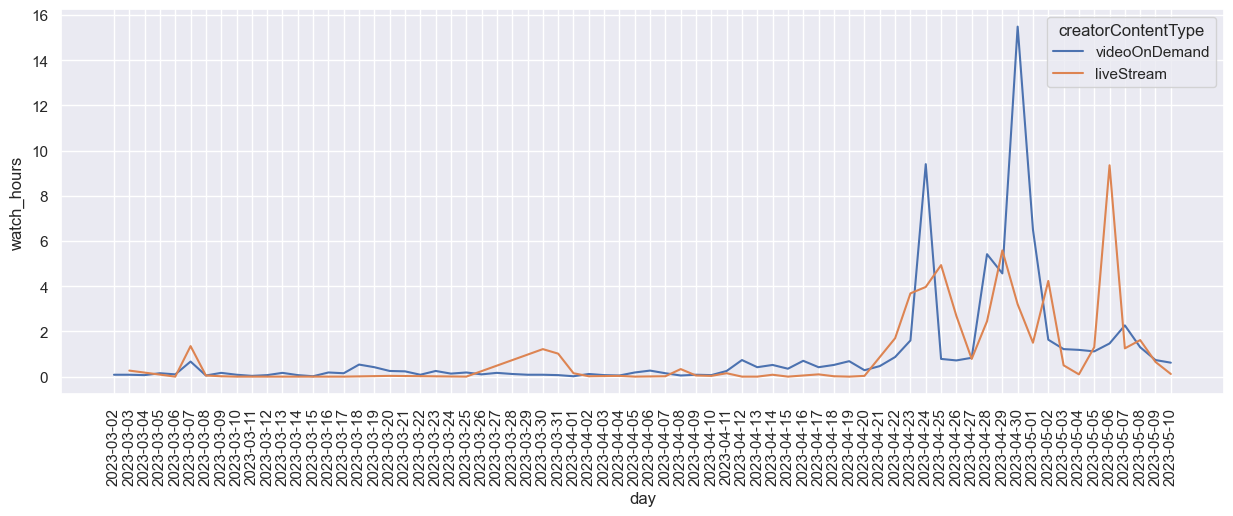

In [11]:
sns.set(rc={'figure.figsize':(15, 5)})
plt.xticks(rotation=90)
sns.lineplot(data=df_video_and_live_2023,
             x="day",
             y="watch_hours",
             hue="creatorContentType")




<Axes: xlabel='day', ylabel='cumulative_watch_hours'>

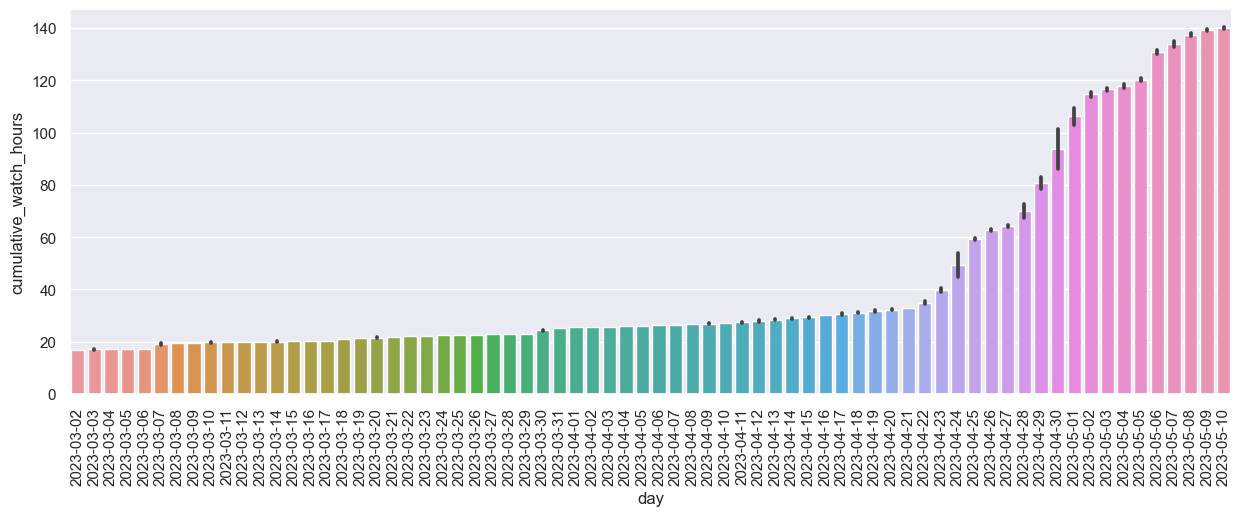

In [12]:
sns.set(rc={'figure.figsize':(15, 5)})
plt.xticks(rotation=90)
sns.barplot(data=df_video_and_live_2023,
             x="day",
             y="cumulative_watch_hours")

<Axes: xlabel='creatorContentType', ylabel='watch_hours'>

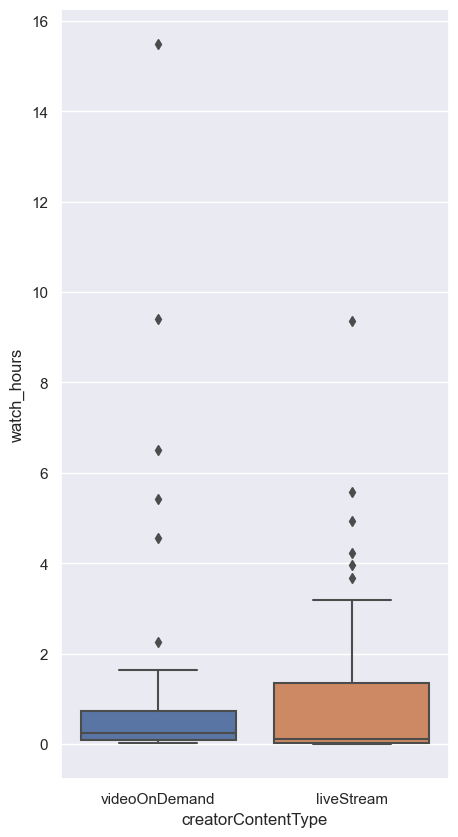

In [13]:
sns.set(rc={'figure.figsize':(5, 10)})
sns.boxplot(data=df_video_and_live_2023,
            x="creatorContentType",
            y="watch_hours")

In [15]:
df_video_and_live_2023

,day,creatorContentType,views,likes,subscribersGained,estimatedMinutesWatched,averageViewDuration,shares,watch_hours,cumulative_watch_hours,partner_goal_watch_hours
314,2023-03-02,videoOnDemand,8,0,0,5,38,0,0.083333,16.750000,4000
315,2023-03-03,liveStream,4,0,0,16,251,0,0.266667,17.016667,4000
317,2023-03-03,videoOnDemand,9,0,0,5,39,0,0.083333,17.100000,4000
319,2023-03-04,videoOnDemand,4,0,0,4,62,0,0.066667,17.166667,4000
321,2023-03-05,videoOnDemand,9,1,0,9,63,0,0.150000,17.316667,4000
...,...,...,...,...,...,...,...,...,...,...,...
504,2023-05-08,videoOnDemand,99,1,0,78,47,0,1.300000,138.033333,4000
505,2023-05-09,liveStream,28,0,0,39,85,0,0.650000,138.683333,4000
507,2023-05-09,videoOnDemand,67,1,0,44,40,0,0.733333,139.416667,4000
508,2023-05-10,liveStream,8,0,0,7,52,0,0.116667,139.533333,4000


In [17]:
fig1 = px.line(df_video_and_live_2023, x='day', y='cumulative_watch_hours')
fig1.show()

In [23]:
fig2 = px.line(df_video_and_live_2023, x='day', y='watch_hours', color='creatorContentType')
fig2.show()